# Importando bibliotecas e observando os dados

In [1]:
# importando as libraries
import os
import pandas as pd
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Leitura dos dados e tratamento dos dados
caminho = '(...)/desafio_notas_Enem'
os.chdir(caminho)

In [3]:
# Leitura do treino
dados_test = pd.read_csv('test.csv', sep = ',')
dados_train = pd.read_csv('train.csv', sep = ',')

dados_test.head()
dados_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


# Tratamento e exploração dos dados 

In [4]:
# Separando as variaveis de entrada das variaveis de saida
dados_test.columns

# Vendo a correlação entre as variáveis
dados_train.corr()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
Unnamed: 0,1.000000,NaN,-0.007258,-0.007250,-0.007201,0.003678,0.005707,-0.006217,-0.004527,-0.004615,...,0.001520,0.018074,0.001693,-0.008141,0.002724,-0.004914,0.003906,0.001002,-0.010967,-0.029937
NU_ANO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO_MUNICIPIO_RESIDENCIA,-0.007258,NaN,1.000000,0.999865,-0.002296,0.020813,-0.236178,0.009710,0.865294,0.865216,...,0.004115,-0.030114,-0.050304,-0.050138,-0.040668,-0.013479,-0.032710,-0.094862,-0.077456,-0.033205
CO_UF_RESIDENCIA,-0.007250,NaN,0.999865,1.000000,-0.002017,0.020947,-0.234786,0.009433,0.864791,0.864919,...,0.003968,-0.030345,-0.050096,-0.049292,-0.040688,-0.013647,-0.032467,-0.094113,-0.076838,-0.033149
NU_IDADE,-0.007201,NaN,-0.002296,-0.002017,1.000000,0.533462,0.009675,-0.017713,-0.030711,-0.030259,...,-0.044791,0.025077,-0.030681,0.012739,0.021949,-0.003569,-0.035306,-0.069973,-0.010988,0.160526
TP_ESTADO_CIVIL,0.003678,NaN,0.020813,0.020947,0.533462,1.000000,0.004950,-0.012160,-0.000046,0.000243,...,-0.017455,-0.009670,-0.016354,-0.002580,0.025840,0.002294,-0.014725,-0.066346,-0.022736,0.108771
TP_COR_RACA,0.005707,NaN,-0.236178,-0.234786,0.009675,0.004950,1.000000,0.015761,-0.253524,-0.252162,...,-0.010398,0.004446,0.031514,0.026052,0.055185,0.086642,0.069298,0.046830,0.053556,0.020966
TP_NACIONALIDADE,-0.006217,NaN,0.009710,0.009433,-0.017713,-0.012160,0.015761,1.000000,NaN,NaN,...,0.013515,0.001575,-0.003419,-0.018290,-0.005285,0.032588,0.024112,0.011327,0.014847,0.008132
CO_MUNICIPIO_NASCIMENTO,-0.004527,NaN,0.865294,0.864791,-0.030711,-0.000046,-0.253524,NaN,1.000000,0.999860,...,-0.001793,-0.043358,-0.051102,-0.057239,-0.046998,-0.024174,-0.038666,-0.097273,-0.081490,-0.042237
CO_UF_NASCIMENTO,-0.004615,NaN,0.865216,0.864919,-0.030259,0.000243,-0.252162,NaN,0.999860,1.000000,...,-0.002089,-0.043492,-0.051094,-0.056401,-0.047069,-0.024201,-0.038305,-0.096666,-0.080963,-0.042134


In [5]:

plt.style.use('ggplot')
%matplotlib inline

features = [
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']
features_corr = [
    'NU_NOTA_MT',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']

In [6]:
# verificando valores nulos nas bases "test" e "train"

dados_train[features].isnull().sum()

dados_test[features].isnull().sum()


NU_NOTA_CN         1134
NU_NOTA_CH         1134
NU_NOTA_LC         1199
NU_NOTA_REDACAO    1199
NU_NOTA_COMP1      1199
NU_NOTA_COMP2      1199
NU_NOTA_COMP3      1199
NU_NOTA_COMP4      1199
NU_NOTA_COMP5      1199
dtype: int64

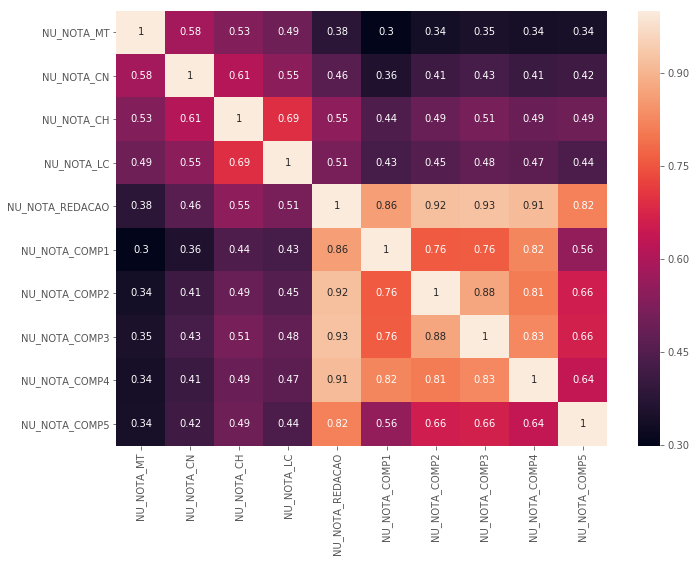

In [7]:
# Gerando heatmap para vermos as correlações

corr = dados_train[features_corr].corr()
ax = plt.subplots(figsize=(11, 8))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10})

In [8]:
# Seleciona somente linhas com valores nesses 4 quesitos a baixo nas bases train e test. Pois não queremos manter os valores 'null' para o modelo.

dados_train = dados_train.loc[
      (dados_train['NU_NOTA_CN'].notnull())  & (dados_train['NU_NOTA_CN'] != 0) & (dados_train['NU_NOTA_CH'].notnull())      & (dados_train['NU_NOTA_CH'] != 0) 
    & (dados_train['NU_NOTA_LC'].notnull())  & (dados_train['NU_NOTA_LC'] != 0) & (dados_train['NU_NOTA_REDACAO'].notnull()) & (dados_train['NU_NOTA_REDACAO'] != 0)    
]



dados_test = dados_test.loc[
      (dados_test['NU_NOTA_CN'].notnull())  & (dados_test['NU_NOTA_CN'] != 0) & (dados_test['NU_NOTA_CH'].notnull())      & (dados_test['NU_NOTA_CH'] != 0) 
    & (dados_test['NU_NOTA_LC'].notnull())  & (dados_test['NU_NOTA_LC'] != 0) & (dados_test['NU_NOTA_REDACAO'].notnull()) & (dados_test['NU_NOTA_REDACAO'] != 0)    
]

dados_test[features].isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
dtype: int64

D:\jean\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


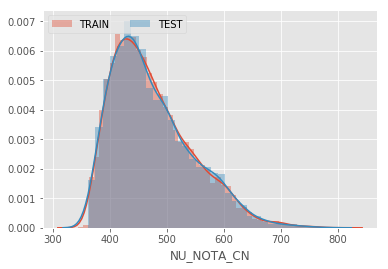

In [9]:
# Plotando grafico de distribuição com os dados arrumados (sem valores nulos ou iguais a 0)
x0 = dados_train['NU_NOTA_CN'].fillna(0)
x1 = dados_test['NU_NOTA_CN'].fillna(0)
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left')

# Construção do modelo de regressão linear simples

In [10]:
# crianado X_train , y_train e X_test para treinar o modelo. 

X_train = dados_train[['NU_NOTA_CN','NU_NOTA_LC','NU_NOTA_CH','NU_NOTA_REDACAO']]
y_train = dados_train['NU_NOTA_MT']

X_test = dados_test[['NU_NOTA_CN','NU_NOTA_LC','NU_NOTA_CH','NU_NOTA_REDACAO']]

In [11]:
# Treinando o modelo de regressão linear
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# Previsao
y_predict = regr.predict(X_test)
y_predict = [int(i) for i in y_predict]
print(y_predict)

[436, 433, 580, 539, 464, 538, 436, 474, 467, 452, 570, 530, 467, 387, 433, 496, 636, 429, 587, 392, 453, 405, 564, 507, 547, 489, 462, 433, 454, 608, 491, 429, 514, 458, 439, 513, 492, 485, 456, 443, 575, 494, 496, 486, 410, 443, 419, 448, 477, 548, 579, 426, 472, 604, 489, 559, 480, 402, 509, 477, 439, 474, 387, 420, 540, 438, 419, 485, 504, 411, 511, 423, 413, 447, 541, 438, 473, 485, 475, 417, 405, 697, 394, 503, 549, 517, 468, 397, 577, 418, 485, 430, 448, 529, 416, 435, 394, 589, 545, 410, 517, 473, 465, 463, 480, 485, 474, 445, 424, 514, 508, 440, 398, 489, 573, 448, 489, 428, 481, 520, 388, 462, 388, 434, 423, 500, 425, 442, 498, 515, 441, 453, 480, 535, 442, 491, 592, 435, 479, 483, 463, 416, 538, 467, 513, 434, 585, 438, 558, 460, 433, 512, 465, 382, 517, 504, 432, 539, 476, 466, 542, 434, 459, 545, 456, 490, 470, 442, 417, 485, 497, 430, 431, 416, 440, 654, 436, 500, 491, 435, 501, 426, 385, 445, 404, 448, 435, 390, 573, 418, 559, 550, 439, 460, 403, 438, 438, 446, 447, 399,

# Obtendo e exportando o resultado final 

In [13]:
# Observando e exportando o resultado final
resultado = pd.DataFrame({"NU_INSCRICAO": dados_test["NU_INSCRICAO"],"NU_NOTA_MT" : y_predict})
print(resultado)

resultado.to_csv("answer.csv",index=False) 
pd.read_csv('answer.csv').head()


                                  NU_INSCRICAO  NU_NOTA_MT
0     73ff9fcc02f0a99919906c942c2e1a1042cdcf98         436
1     71a95f9f1b91a82c65ad94abbdf9f54e6066f968         433
2     b38a03232f43b11c9d0788abaf060f7366053b6d         580
4     715494628a50142ce8cb17191cfe6d0f3cae0934         539
5     e656d6bad65c93fb2880f1eba5037008c8e75774         464
6     465cd2a6907fb37d9d8ad3c065f0e2dabdba9b13         538
7     11539e86171bf07d3a36f09377d7f54ebcc8406a         436
8     043c544a2104aa8a9849f1a703a08d37a2f16839         474
9     76ba050e64ad100b856f0eaabd8f539d5c7dd185         467
12    940aede382ccb332fab15d413217695ec44ca765         452
13    9ad714b116da76d878dd399d187fccc2dd13dd63         570
14    dd34464a4d780b12a089347ad580418ac57a3055         530
15    f837a4cb05a5fd59d20138182f5e8c721eadd584         467
19    051c4f04fcbe385e1b3964aeb87f0a41d7f203d0         387
20    3d203727f27abd83b71732d88d8cb1cc099f363b         433
23    cbc301183dec912f3513ca766bf03dd565f3a38f         4

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,436
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,433
2,b38a03232f43b11c9d0788abaf060f7366053b6d,580
3,715494628a50142ce8cb17191cfe6d0f3cae0934,539
4,e656d6bad65c93fb2880f1eba5037008c8e75774,464
